# OSEMN Exercises

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [16]:
N = 100
rand_list = np.random.random(N)
fhandle = open("simple_data.txt","w")
for i in rand_list:
    fhandle.write(str(i)+"\n")
fhandle.close()

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [17]:
randmat = np.random.random(25).reshape(5,5)
print(randmat)
t = ""
for i in range(5):
    for j in range(5):
        t += str(randmat[i,j])+"\t"
    t = t[:-1]
    t += "\n"
t = t[:-1]
fhandle = open("data.txt","w")
fhandle.write(t)
fhandle.close()

[[0.69818731 0.35784505 0.23857912 0.39421287 0.8558627 ]
 [0.14244181 0.21077372 0.77560428 0.73521864 0.62833988]
 [0.14143174 0.6220484  0.38558227 0.70972823 0.58184708]
 [0.29649022 0.09032503 0.65334521 0.04069806 0.69931754]
 [0.1058591  0.70225142 0.36898517 0.88524852 0.49164022]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [18]:
fhandle = open("data.txt","r")
data = fhandle.read().split("\n")
fhandle.close()
csv_output = ''
for i in data:
    t = i.split('\t')
    for n in t:
        csv_output += n+","
    csv_output = csv_output[:-1]
    csv_output += "\n"
fhandle = open("data.csv","w")
fhandle.write('C0,C1,C2,C3,C4,C5\n')
fhandle.write(csv_output)
fhandle.close()

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [19]:
def todec(b_input):
    n = 0
    for i in range(0,len(b_input),1):
        n += int(b_input[i])*2**(len(b_input)-1-i)
    return n

# reading the input file
fhandle = open("credit_card.dat","r")
data = fhandle.read().split("\n")
data.pop()
fhandle.close()

# converting
cc_numbers = []
for c_data in data:
    c_numb = ''
    for i in range(0,len(c_data)-4,6):
        c_numb += chr(todec(c_data[i:i+6]))
    print(c_numb)
    cc_numbers.append(c_numb)

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0026
3026 7380 1241 1084


5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [33]:
import json, csv
data = json.load(open("user_data.json"))
extr_data = [entry for entry in data if entry['CreditCardType']=='American Express']
# getting the field names
fieldnames = [fname for fname in data[0]]
# saving to csv
with open('user_data_filtered.csv', 'w', newline='\n') as csv_output:
    writer = csv.DictWriter(csv_output, fieldnames=fieldnames)
    writer.writeheader()
    for row in extr_data:
        writer.writerow(row)

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


In [36]:
import urllib.request
url='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
with urllib.request.urlopen(url) as csv_input_file:
    csv_input = pd.read_csv(csv_input_file)

In [37]:
csv_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

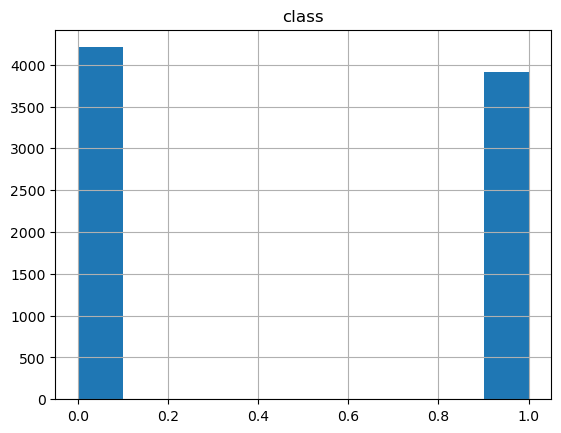

In [38]:
csv_input.hist('class')

The entries have been labelled with two classes. The number of entries in one is nearly equal to the number of entries in the order, indicating a nearly-uniform distribution between the samples of each species.

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [10]:
url='https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
with urllib.request.urlopen(url) as csv_input_file_7:
    csv_input_7 = pd.read_csv(csv_input_file_7)

<AxesSubplot:xlabel='features_2', ylabel='features_3'>

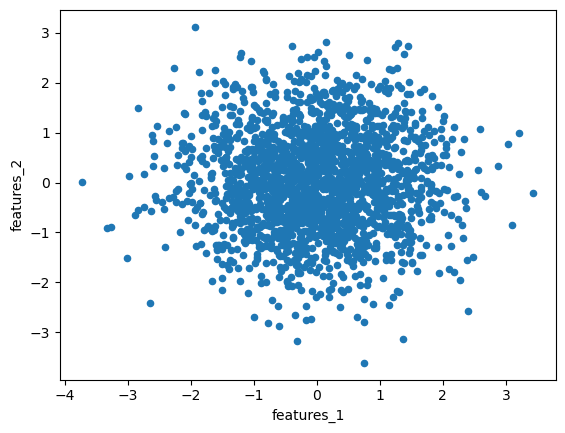

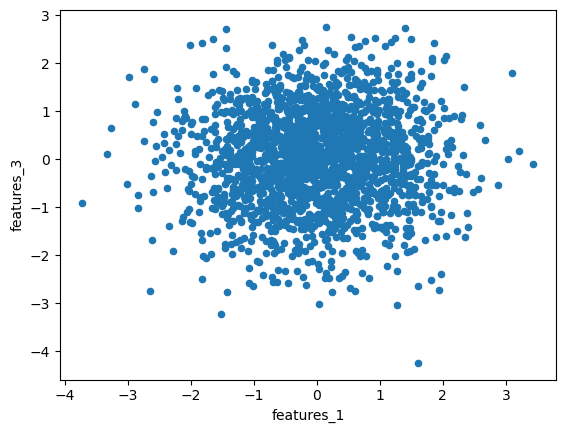

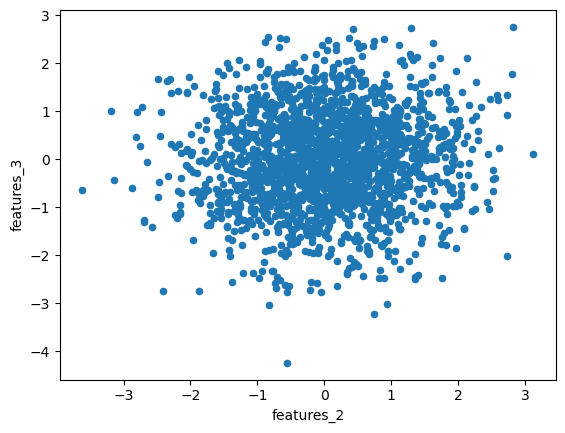

In [11]:
csv_input_7.plot.scatter('features_1','features_2')
csv_input_7.plot.scatter('features_1','features_3')
csv_input_7.plot.scatter('features_2','features_3')

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [12]:
url='https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
with urllib.request.urlopen(url) as csv_input_file:
    csv_input = pd.read_csv(csv_input_file)

In [13]:
json_output = csv_input.to_json(orient='records')
#print(json_output[0:395])
json_output_file = open('mushrooms_categorized.json','w')
json_output_file.write(json_output)
json_output_file.close()